C:\Users\abirm\AppData\Local\Temp\ipykernel_29816\1689623034.py:31: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image = Image.fromarray(image, 'RGB') # convertit ce tableau en objet PIL


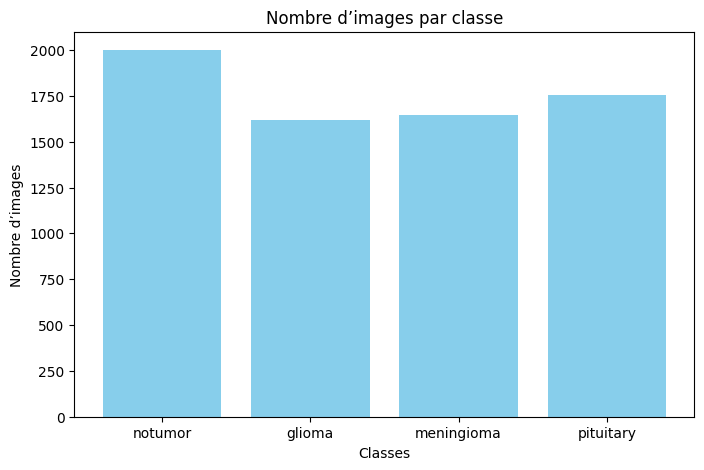

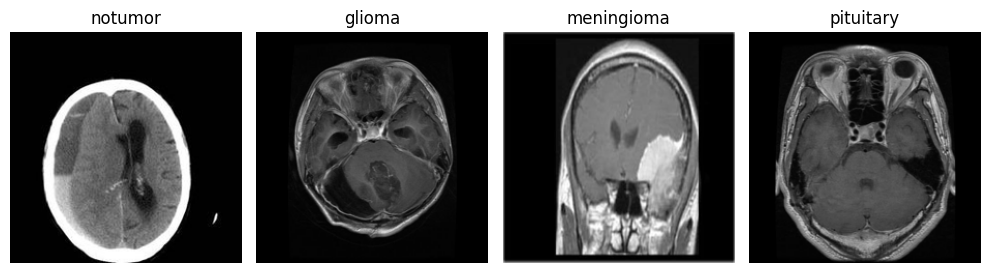

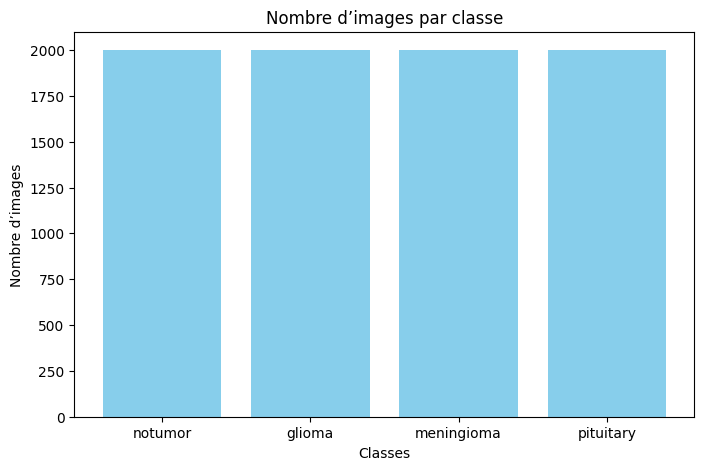

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

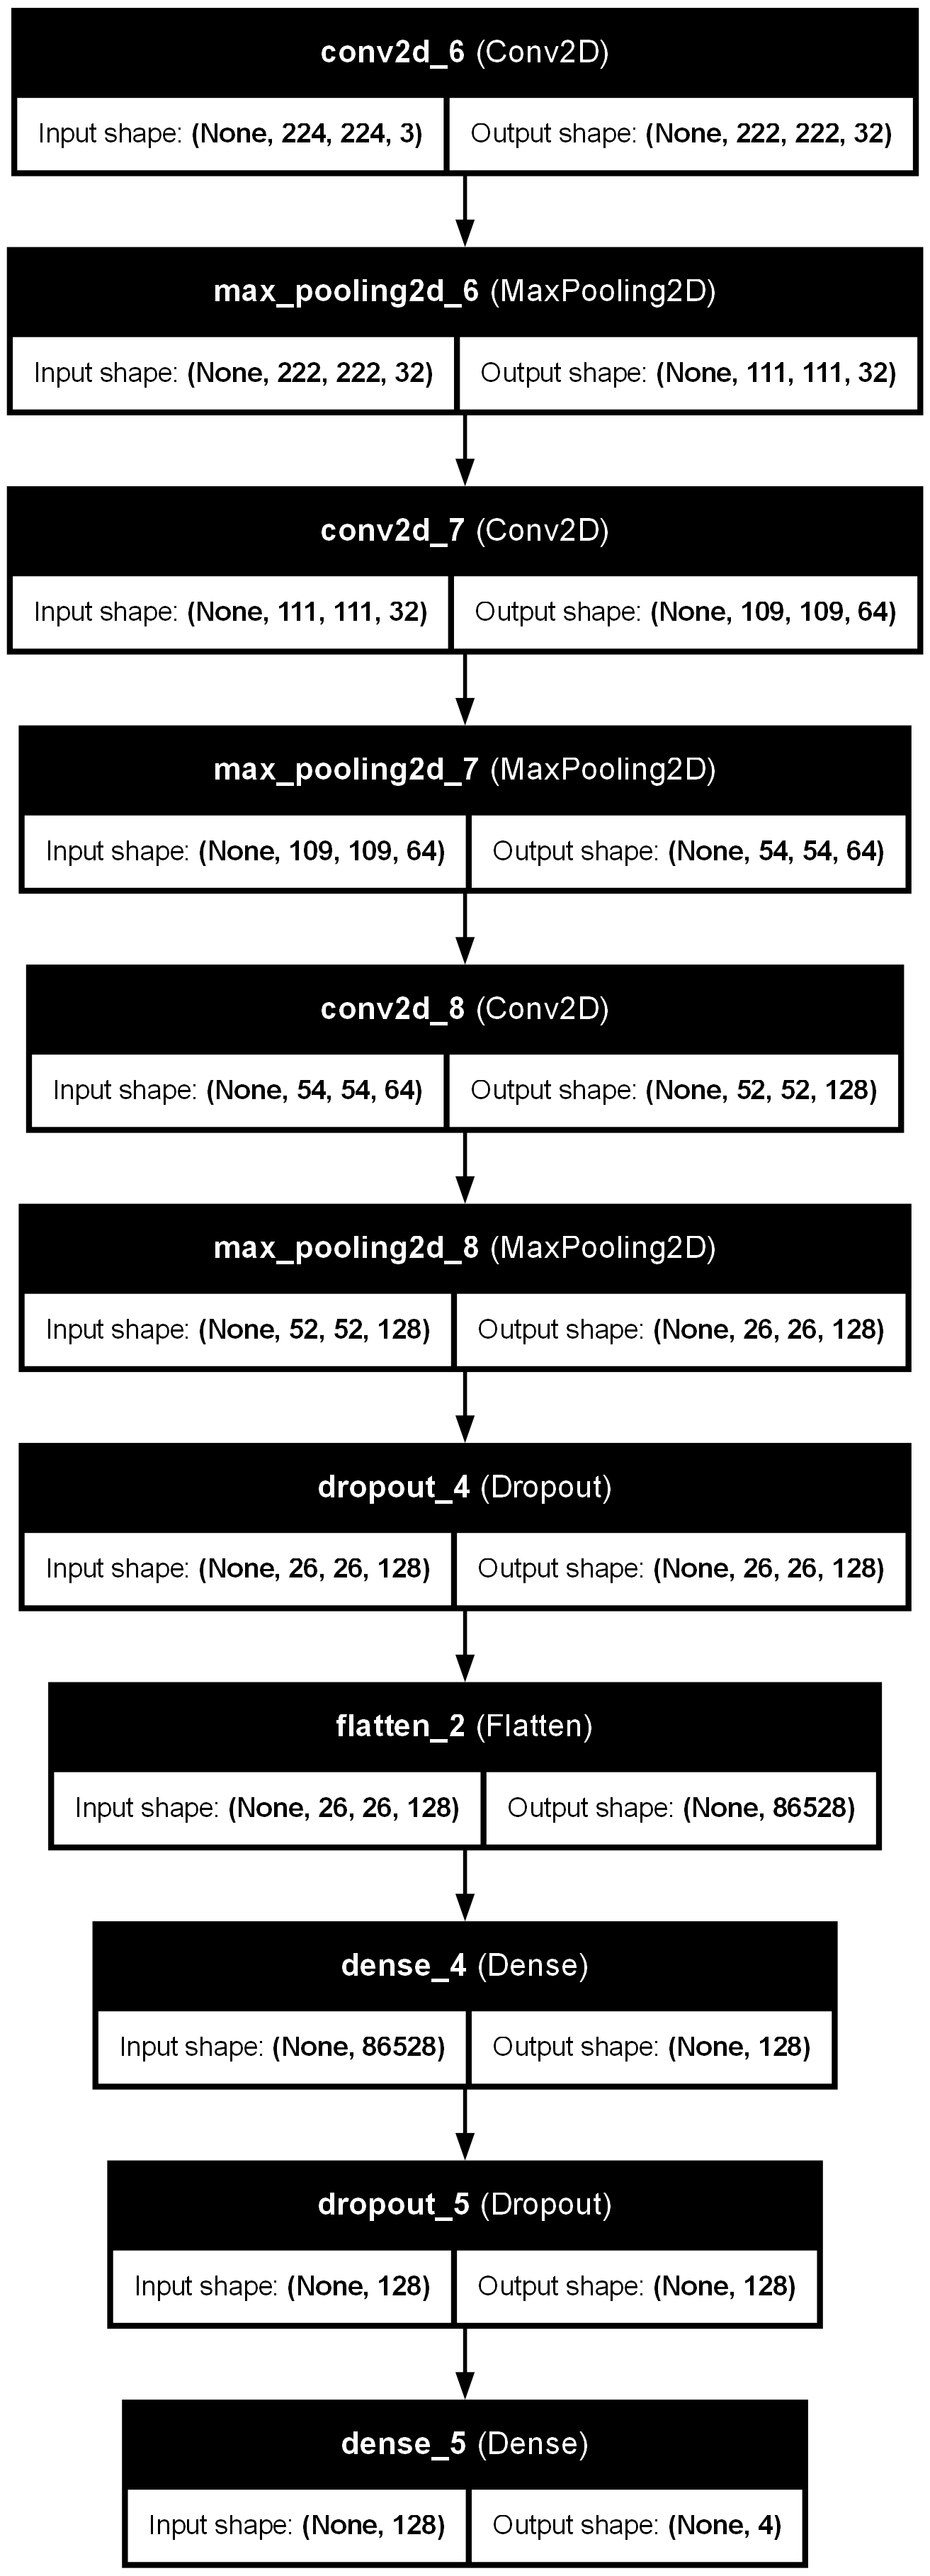

In [5]:
import os 
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D, Activation , Dropout, Flatten , Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam


image_directory = 'Data/'
folders = {
    'notumor': 0,
    'glioma': 1,
    'meningioma': 2,
    'pituitary': 3
}
dataset = []
label = []

for folder_name, folder_label in folders.items():
    images = os.listdir(image_directory + folder_name + '/')
    for image_name in images:
        ext = image_name.split('.')[-1].lower()
        if ext in ['jpg', 'jpeg', 'bmp', 'png']:
            image = cv2.imread(image_directory + folder_name + '/' + image_name) # lit l’image depuis le disque en tableau NumPy
            image = Image.fromarray(image, 'RGB') # convertit ce tableau en objet PIL
            image = image.resize((224, 224)) # Redimensionner les images à une taille fixe 224×224 à l’aide de la bibliothèque OpenCV.
            dataset.append(np.array(image)) # retransforme en tableau NumPy pour ML 
            label.append(folder_label) #Chaque image et son label doivent avoir le même indice dans les deux listes.
            
#Une fois toutes les images et leurs labels chargés, convertir les listes images et étiquettes en tableaux NumPy pour les rendre exploitables par le modèle CNN.
dataset = np.array(dataset)
label = np.array(label)



#Afficher graphiquement le nombre d’images dans chaque classe.
classes, counts = np.unique(label, return_counts=True) # compter combien d’images pour chaque classe
class_names = list(folders.keys())
plt.figure(figsize=(8,5))
plt.bar(class_names, counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Nombre d’images')
plt.title('Nombre d’images par classe')
plt.show()





# Montrer un échantillon d’images pour chaque classe.
class_names = list(folders.keys()) # Récupérer les noms des classes dans l’ordre de leur label
plt.figure(figsize=(10, 6)) # Définir la taille du graphique (1 ligne, 4 colonnes)
for i, class_name in enumerate(class_names): # Afficher 1 image par classe
    class_indices = np.where(label == i)[0] # Trouver les indices des images appartenant à cette classe
    image = dataset[class_indices[0]] # Récupérer l'image correspondante
    # Créer un sous-graphique
    plt.subplot(1, len(class_names), i + 1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()
plt.show()




#Vérifier l’équilibre entre les classes et appliquer un rééquilibrage si nécessaire.
# classes, counts = np.unique(label, return_counts=True)
inverse_folders = {v: k for k, v in folders.items()}
# for c, count in zip(classes, counts):
#     print(f"Classe {inverse_folders[c]}: {count} images")

# Classe notumor: 2000 images
# Classe glioma: 1621 images
# Classe meningioma: 1645 images
# Classe pituitary: 1757 images


#utilisation de data augmentaion



train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Calculer le nombre d'images à générer pour chaque classe
max_count = 2000

augmented_dataset = list(dataset)
augmented_labels = list(label)

# Pour chaque classe, générer des images augmentées
for class_label in classes:
    # Trouver les images de cette classe
    class_indices = np.where(label == class_label)[0]
    class_images = dataset[class_indices]
    current_count = len(class_images)
    # Calculer combien d'images à générer
    images_to_generate = max_count - current_count
    if images_to_generate > 0:
        generated = 0
        while generated < images_to_generate:
            random_image = class_images[np.random.randint(0, len(class_images))] # Choisir une image au hasard dans cette classe
            random_image = np.expand_dims(random_image, axis=0) # Ajouter une dimension batch (le générateur attend format (batch, height, width, channels))
            augmented_image = train_datagen.random_transform(random_image[0]) # Générer une image augmentée
            augmented_dataset.append(augmented_image) # Ajouter au dataset augmenté
            augmented_labels.append(class_label)
            generated += 1
# Convertir en arrays NumPy
augmented_dataset = np.array(augmented_dataset)
augmented_labels = np.array(augmented_labels)



classes, counts = np.unique(augmented_labels, return_counts=True) # compter combien d’images pour chaque classe
class_names = list(folders.keys())
plt.figure(figsize=(8,5))
plt.bar(class_names, counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Nombre d’images')
plt.title('Nombre d’images par classe')
plt.show()


x = augmented_dataset/255.0 # normalisation
y = augmented_labels

y = to_categorical(y, num_classes=4) # to_categorical 



from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=1)


# model building

model = Sequential()
#couvhe 1
model.add(Conv2D(32 , (3 ,3) , input_shape = (224 , 224 ,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# couvhe 2
model.add(Conv2D(64 , (3 ,3) , activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#couvhe 3
model.add(Conv2D(128 , (3 ,3) , activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Évite le surapprentissage (overfitting) en désactivant aléatoirement certains neurones
model.add(Dropout(0.5))

model.add(Flatten()) # Transforme l’image (2D) en un vecteur (1D)
model.add(Dense(128, activation='relu'))  # Couche cachée
model.add(Dropout(0.5))

# dense Combine toutes les caractéristiques pour faire une prédiction finale
model.add(Dense(4, activation='softmax')) # 4 classes

optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer, # méthode d’apprentissage
    loss='categorical_crossentropy', # mesure l’erreur
    metrics=['accuracy'] # affiche la précision
)

model.summary()
plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)


















In [6]:
batch_size = 32
epochs = 30



import time
start_time = time.time()

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test)
)
end_time = time.time()  # Fin de l'entraînement
training_time = end_time - start_time
print("training time: " , training_time)




Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 80s 389ms/step - accuracy: 0.6858 - loss: 0.7812 - val_accuracy: 0.8100 - val_loss: 0.4736
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 101s 501ms/step - accuracy: 0.8214 - loss: 0.4635 - val_accuracy: 0.8619 - val_loss: 0.3697
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 61s 305ms/step - accuracy: 0.8698 - loss: 0.3358 - val_accuracy: 0.8900 - val_loss: 0.2947
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 59s 293ms/step - accuracy: 0.8941 - loss: 0.2782 - val_accuracy: 0.8963 - val_loss: 0.2562
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 59s 293ms/step - accuracy: 0.9184 - loss: 0.2121 - val_accuracy: 0.9056 - val_loss: 0.2486
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 62s 308ms/step - accuracy: 0.9380 - loss: 0.1727 - val_accuracy: 0.9175 - val_loss: 0.2380
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 60s 302ms/step - accuracy: 0.9448 - loss: 0.1427 - val_accuracy: 0.9137 - val_loss: 0.2649
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 60s 299ms/step - accuracy: 0.9530 - loss: 

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.9194 - loss: 0.5257
Test Accuracy: 0.9193750023841858
Test Loss: 0.5256528258323669


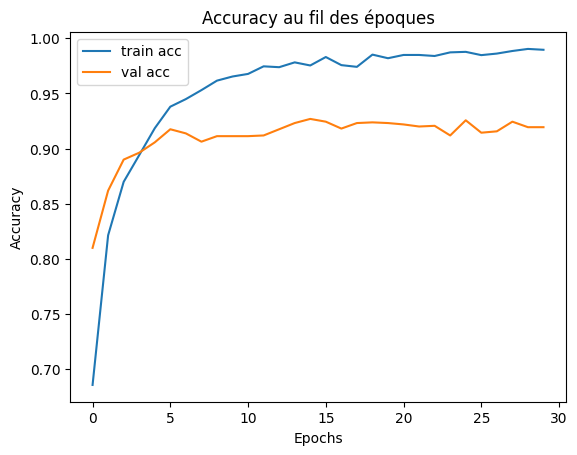

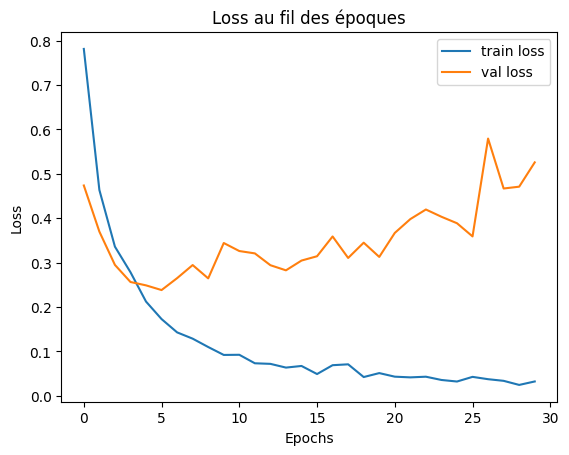

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy au fil des époques')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss au fil des époques')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [13]:
batch_size = 64
epochs = 30


from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='max')

import time
start_time = time.time()

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    callbacks=[early_stop , checkpoint]
)
end_time = time.time()  # Fin de l'entraînement
training_time = end_time - start_time
print("training time: " , training_time)




Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 725ms/step - accuracy: 0.9958 - loss: 0.0171

100/100 ━━━━━━━━━━━━━━━━━━━━ 79s 797ms/step - accuracy: 0.9962 - loss: 0.0143 - val_accuracy: 0.9281 - val_loss: 0.4459
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 488ms/step - accuracy: 0.9953 - loss: 0.0162 - val_accuracy: 0.9181 - val_loss: 0.4355
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 655ms/step - accuracy: 0.9912 - loss: 0.0267

100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 710ms/step - accuracy: 0.9917 - loss: 0.0238 - val_accuracy: 0.9200 - val_loss: 0.5222
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 601ms/step - accuracy: 0.9941 - loss: 0.0176 - val_accuracy: 0.9219 - val_loss: 0.3792
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 780ms/step - accuracy: 0.9923 - loss: 0.0179 - val_accuracy: 0.9187 - val_loss: 0.4334
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 754ms/step - accuracy: 0.9942 - loss: 0.0185 - val_accuracy: 0.9119 - val_loss: 0.4486
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 753ms/step - accuracy: 0.9947 - loss: 0.0187 - val_accuracy: 0.9219 - val_loss: 0.5116
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 781ms/step - accuracy: 0.9936 - loss: 0.0180 - val_accuracy: 0.9262 - val_loss: 0.4684
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 574ms/step - accuracy: 0.9928 - loss: 0.0224 - val_accuracy: 0.9250 - val_loss: 0.4994
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 80s 805ms/step - accuracy: 0.9939 - loss: 0.0174 - va

100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 489ms/step - accuracy: 0.9920 - loss: 0.0199 - val_accuracy: 0.9250 - val_loss: 0.5405
training time:  916.7877039909363


In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9219 - loss: 0.3792
Test Accuracy: 0.921875
Test Loss: 0.3791666328907013


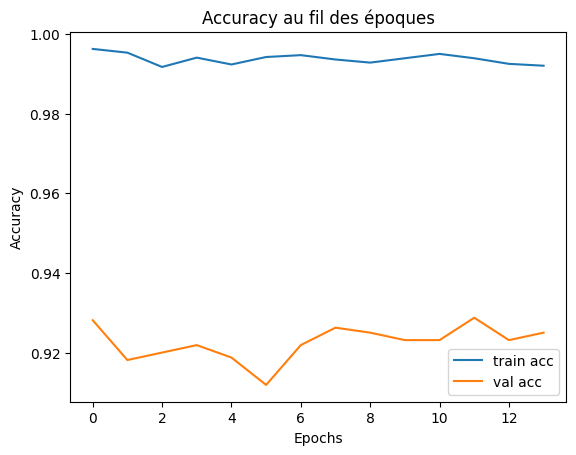

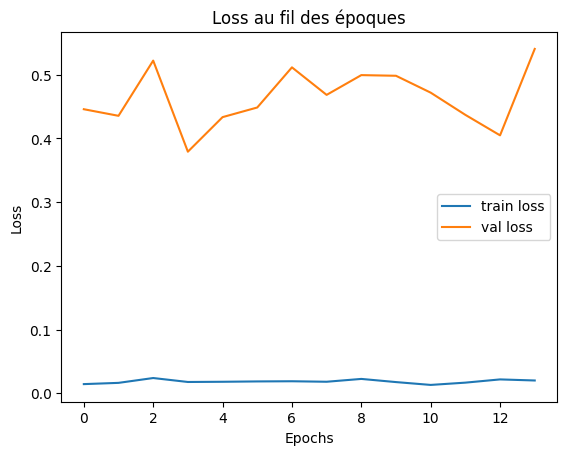

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy au fil des époques')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss au fil des époques')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step


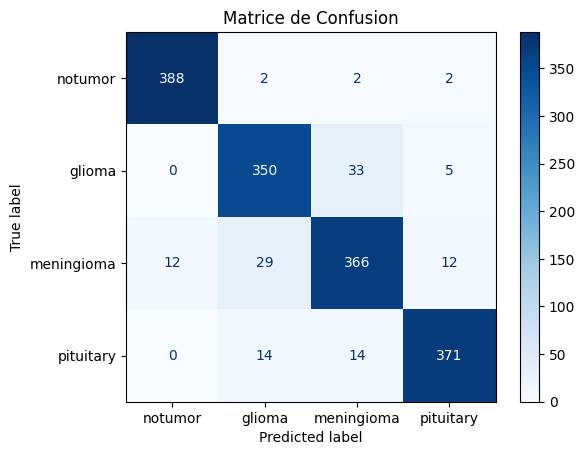

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_probs = model.predict(x_test)  # prédictions probabilités
y_pred = np.argmax(y_pred_probs, axis=1)  # classes prédites

y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de Confusion")
plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step


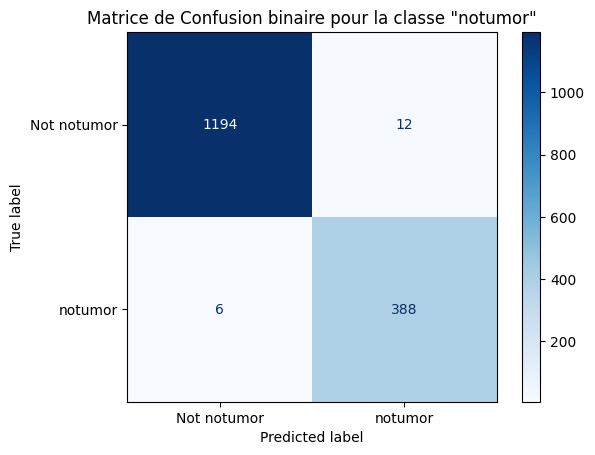

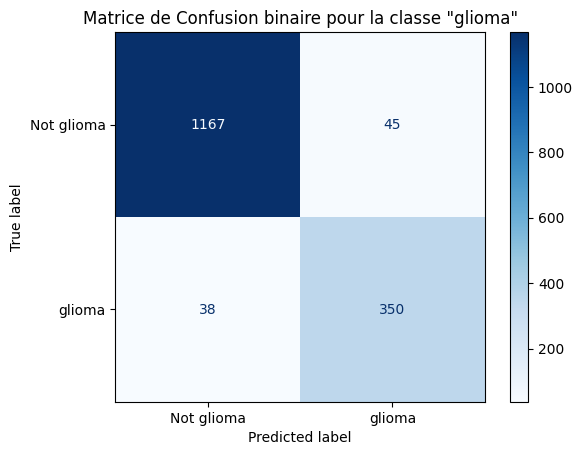

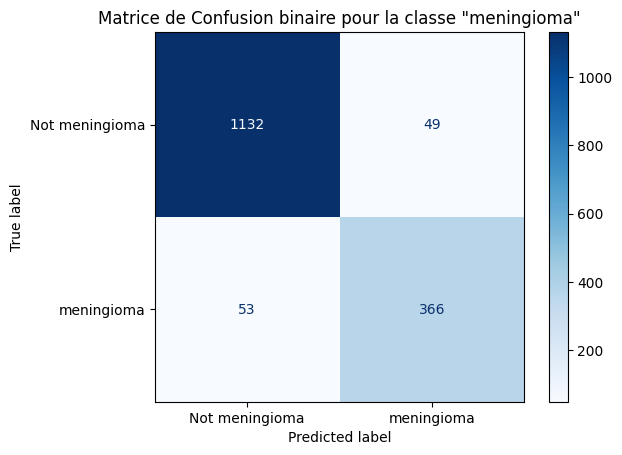

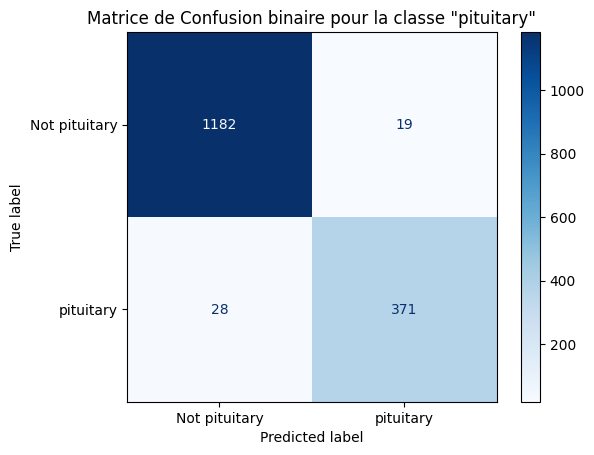

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Prédictions du modèle
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Afficher 4 matrices de confusion binaires (1 par classe)
for i, class_name in enumerate(class_names):
    # Binariser les vraies étiquettes et les prédictions pour la classe i
    y_true_binary = (y_true == i).astype(int)
    y_pred_binary = (y_pred == i).astype(int)
    
    # Calcul matrice de confusion binaire
    cm = confusion_matrix(y_true_binary, y_pred_binary)
    
    # Affichage
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f'Not {class_name}', class_name])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Matrice de Confusion binaire pour la classe "{class_name}"')
    plt.show()
